In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "/UNSW_NB15_training-set.csv"
df = pd.read_csv(file_path, low_memory=False)


In [3]:
# structure
print("===== DATASET INFORMATION =====")
print(f"Shape: {df.shape}")
print("\nData Types:\n", df.dtypes.head(10))
print("\nColumn Names:\n", df.columns.tolist()[:15])
print("\nFirst 5 Rows:\n", df.head())

===== DATASET INFORMATION =====
Shape: (82332, 45)

Data Types:
 id           int64
dur        float64
proto       object
service     object
state       object
spkts        int64
dpkts        int64
sbytes       int64
dbytes       int64
rate       float64
dtype: object

Column Names:
 ['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss']

First 5 Rows:
    id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                 1               2             0   
1  125000.

In [4]:
# summarry statistics
print("\n===== STATISTICAL SUMMARY =====")
print(df.describe())


===== STATISTICAL SUMMARY =====
                 id           dur         spkts         dpkts        sbytes  \
count  82332.000000  82332.000000  82332.000000  82332.000000  8.233200e+04   
mean   41166.500000      1.006756     18.666472     17.545936  7.993908e+03   
std    23767.345519      4.710444    133.916353    115.574086  1.716423e+05   
min        1.000000      0.000000      1.000000      0.000000  2.400000e+01   
25%    20583.750000      0.000008      2.000000      0.000000  1.140000e+02   
50%    41166.500000      0.014138      6.000000      2.000000  5.340000e+02   
75%    61749.250000      0.719360     12.000000     10.000000  1.280000e+03   
max    82332.000000     59.999989  10646.000000  11018.000000  1.435577e+07   

             dbytes          rate          sttl          dttl         sload  \
count  8.233200e+04  8.233200e+04  82332.000000  82332.000000  8.233200e+04   
mean   1.323379e+04  8.241089e+04    180.967667     95.713003  6.454902e+07   
std    1.514715e+0

In [5]:
# checking missing values/duplicates
print("\n===== DATA QUALITY CHECK =====")
print("Missing values per column:\n", df.isnull().sum().sort_values(ascending=False).head(10))
print(f"\nDuplicate records: {df.duplicated().sum()}")


===== DATA QUALITY CHECK =====
Missing values per column:
 id         0
dur        0
proto      0
service    0
state      0
spkts      0
dpkts      0
sbytes     0
dbytes     0
rate       0
dtype: int64

Duplicate records: 0


In [6]:
df = df.drop_duplicates()

In [8]:
#columns to drop
df = df.dropna(thresh=len(df.columns) * 0.8)

In [9]:
# fill missing numeric values
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [10]:
# appropriate data types
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [11]:
#invalid records
if 'label' in df.columns:
    df = df[df['label'].isin([0, 1])]  #for binary labels filter

DATA VISUALIZATION


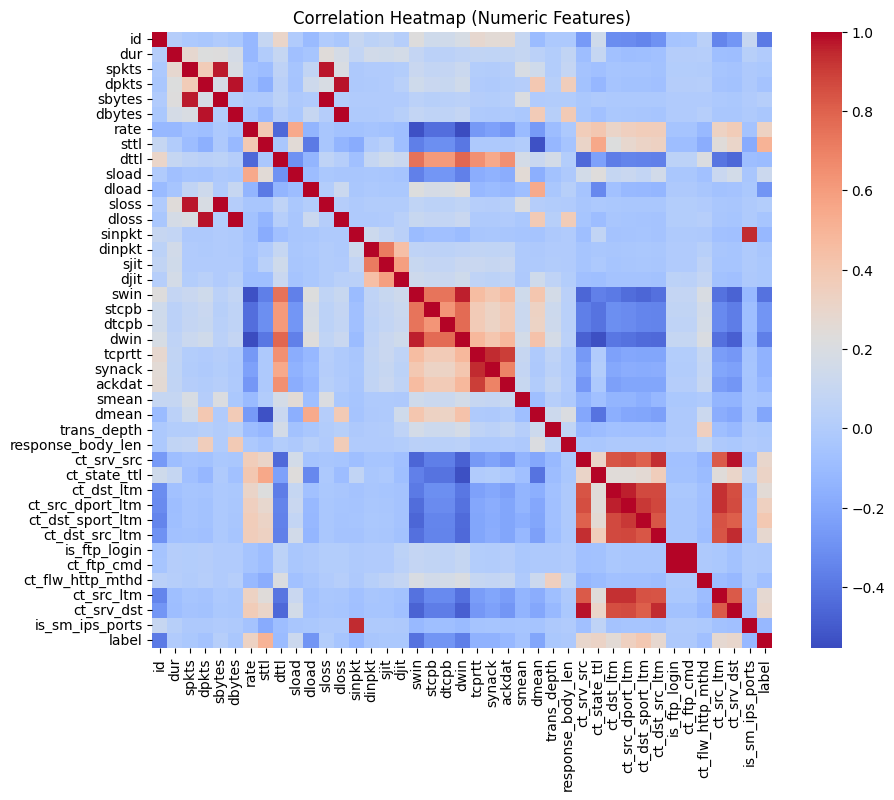

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

/tmp/ipython-input-1220067967.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


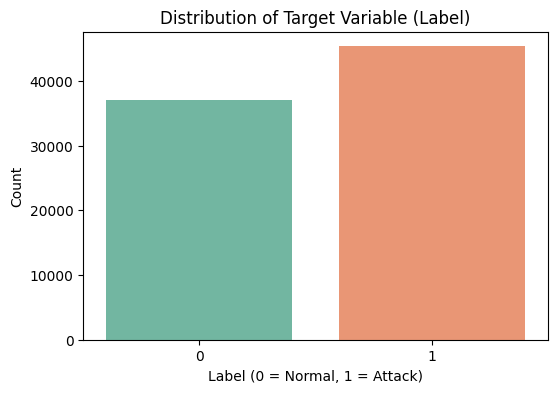

In [13]:
#Distribution of variables
if 'label' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='label', data=df, palette='Set2')
    plt.title("Distribution of Target Variable (Label)")
    plt.xlabel("Label (0 = Normal, 1 = Attack)")
    plt.ylabel("Count")
    plt.show()

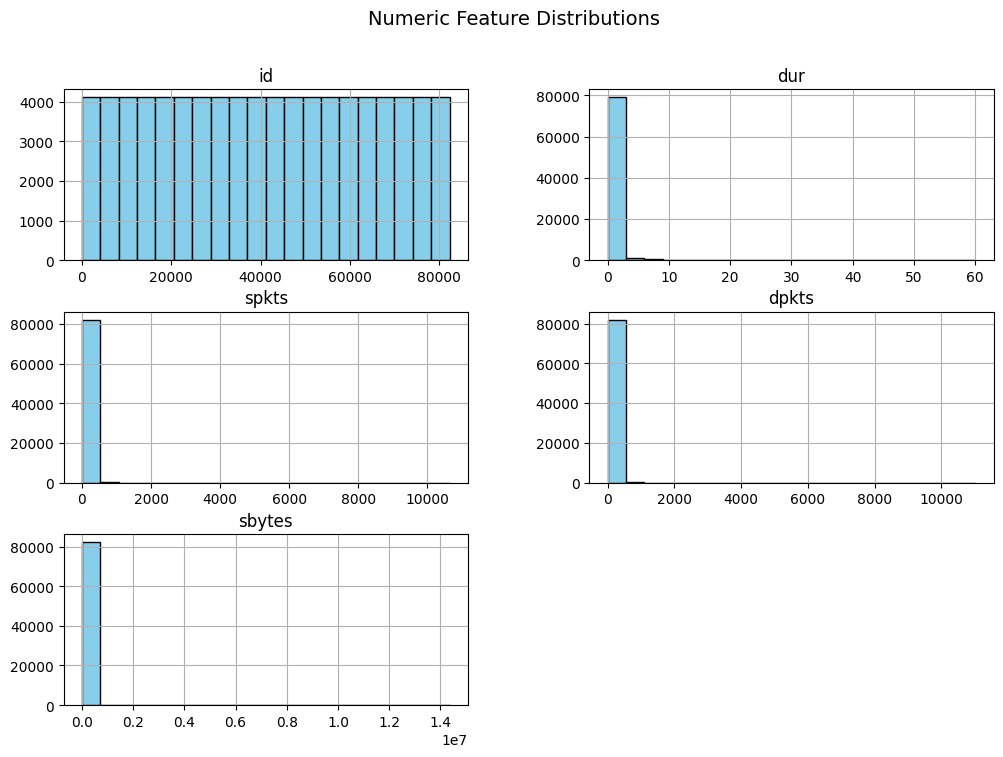

In [14]:
#Feature numeric distribution
num_features = df.select_dtypes(include=np.number).columns[:5]
df[num_features].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Numeric Feature Distributions", fontsize=14)
plt.show()

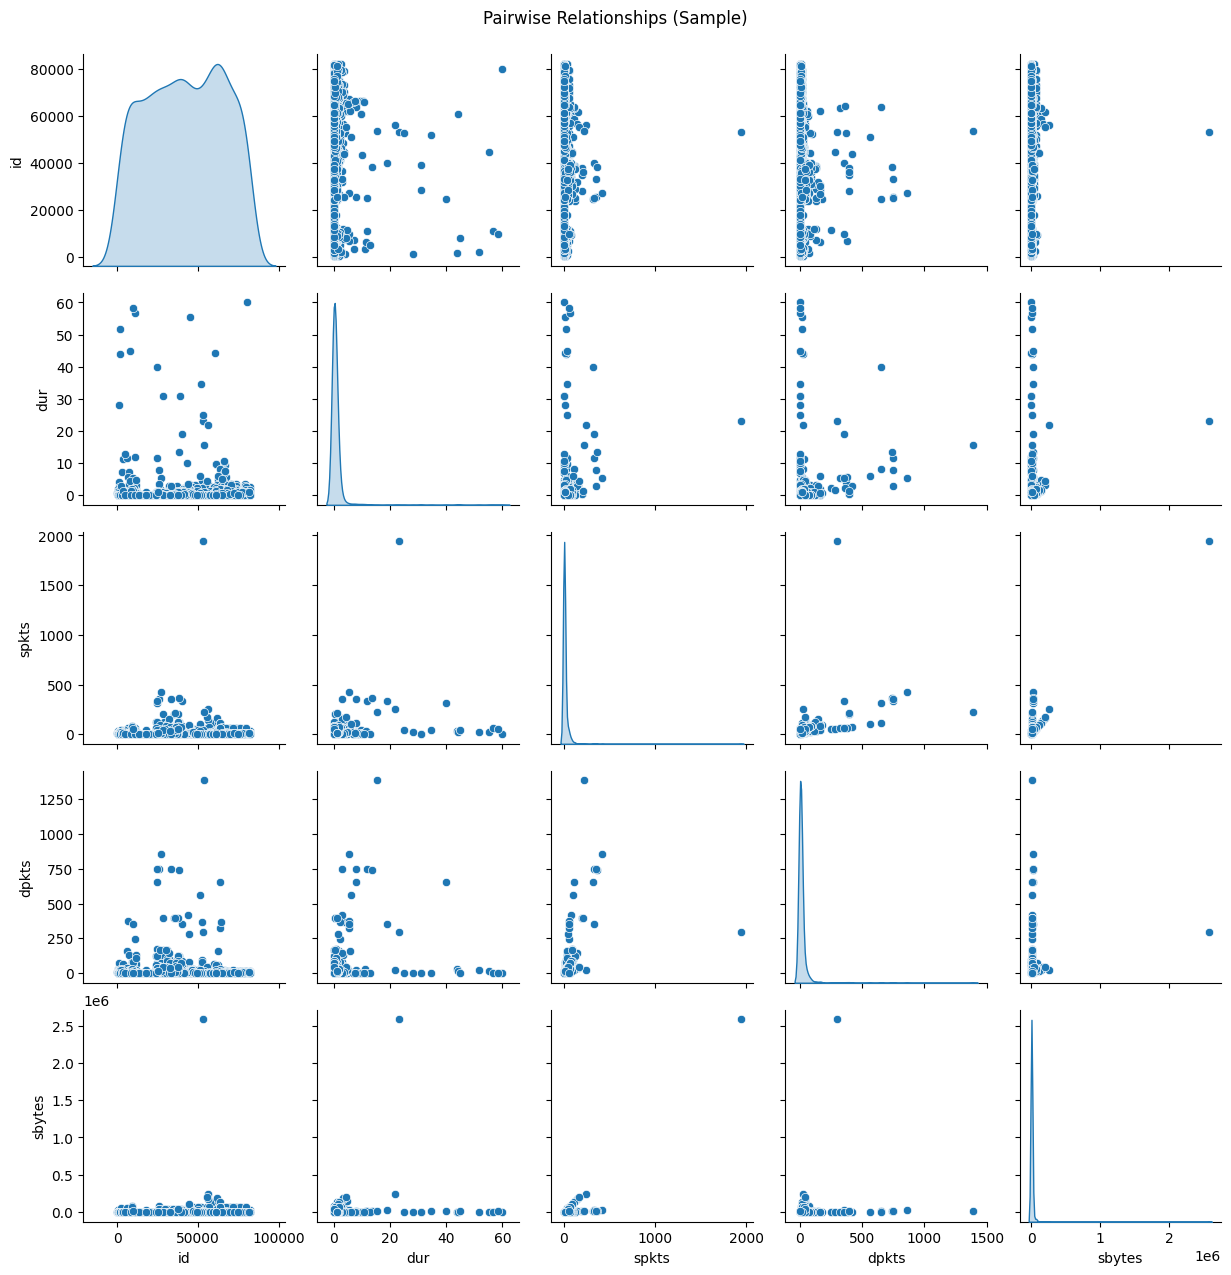

In [15]:
# pairplot
sample = df.sample(n=min(2000, len(df)), random_state=42)
sns.pairplot(sample[num_features], diag_kind='kde')
plt.suptitle("Pairwise Relationships (Sample)", y=1.02)
plt.show()

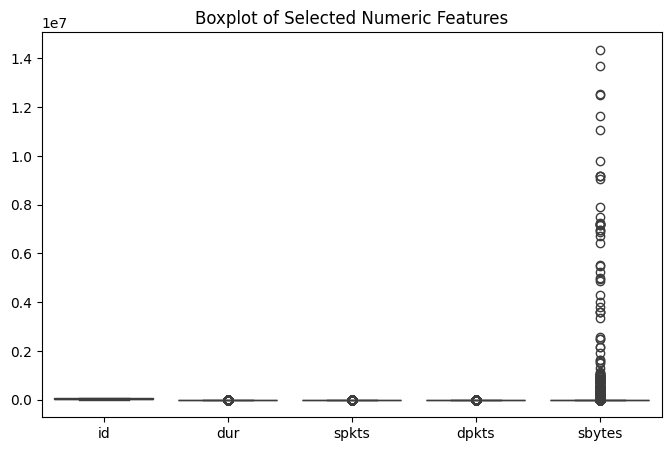

In [16]:
#boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[num_features])
plt.title("Boxplot of Selected Numeric Features")
plt.show()